# Requirements

In [1]:
from gplearn.genetic import SymbolicRegressor
from gplearn.functions import make_function
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

# Data set

The data is stored in the file `data.txt`. The first column is the time, the second the measured value at that time.

In [2]:
data = np.genfromtxt('data.txt', delimiter=',')

In [3]:
t, measurement = data[:, 0], data[:, 1]

We reshape the input to a 2D array.

In [4]:
t = t.reshape((-1, 1))

In [5]:
t.shape

(100, 1)

Now we split the data set into a training and a test set, fixing the random state to get reproducible results.

In [7]:
t_train, t_test, m_train, m_test = train_test_split(t, measurement, test_size=1/3, random_state=27)

We can plot both sets to get some intuition about the data.

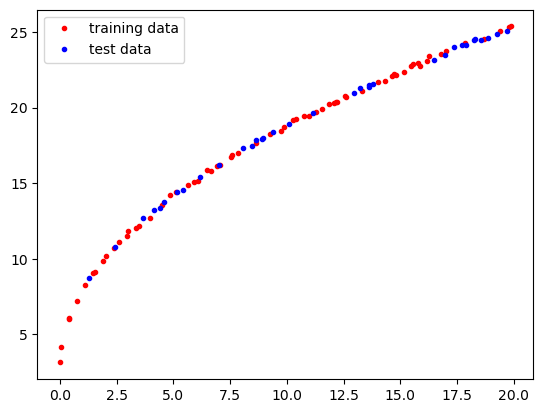

In [15]:
plt.plot(t_train, m_train, 'r.', label='training data')
plt.plot(t_test, m_test, 'b.', label='test data')
plt.legend();

# Random forest regression

We can now train a random forest regressor.

In [17]:
rfr = RandomForestRegressor(100, random_state=71).fit(t_train, m_train)

It scores fairly high on the test set.

In [18]:
rfr.score(t_test, m_test)

0.998287165688466

We can use the random forest regressor to compute the prediction for points in our domain.

In [19]:
t_values = np.linspace(0.0, 20.0, 100)
m_values = rfr.predict(t_values.reshape((-1, 1)))

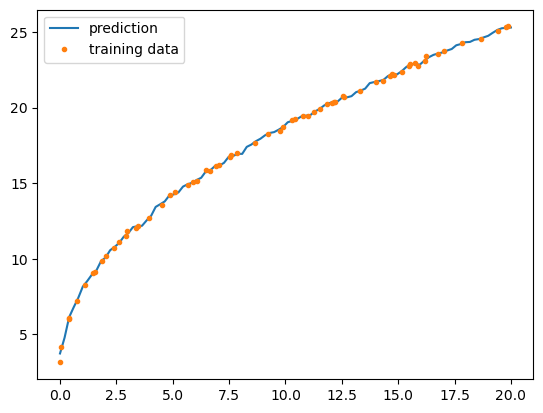

In [20]:
plt.plot(t_values, m_values, label='prediction')
plt.plot(t_train, m_train, '.', label='training data')
plt.legend();

# Symoolic regressoin

Symbolic regression uses genetic programming to find a symbolic exxpression that fits the data

In [25]:
sr = SymbolicRegressor(population_size=5000,
                       generations=20,
                       stopping_criteria=0.01,
                       p_crossover=0.7,
                       p_subtree_mutation=0.1,
                       p_hoist_mutation=0.05,
                       p_point_mutation=0.1,
                       max_samples=0.9, verbose=1,
                       parsimony_coefficient=0.01,
                       function_set=['add', 'sub', 'mul', 'div',
                                     'sqrt', 'log', 'neg', 'inv',
                                     'sin', 'cos', 'tan'],
                       random_state=79)

Note that by default only addition, substraction, multipliction and division are considered to build expressions. We want to use all available functions.

In [26]:
sr.fit(t_train, m_train)

    |   Population Average    |             Best Individual              |
---- ------------------------- ------------------------------------------ ----------
 Gen   Length          Fitness   Length          Fitness      OOB Fitness  Time Left
   0    11.46          32.0232       16          3.15582          3.49462     46.66s
   1    11.00          19.4228        6          1.00154          1.10901     44.73s
   2    11.17          20.4091       11         0.819705         0.521727     41.56s
   3    14.17          20.4973       21         0.491039         0.765305     41.76s
   4    14.69          11.3108       22          0.46323         0.999692     41.59s
   5    10.18          9.92357       22         0.374508         0.556654     41.25s
   6    10.00          14.5912       25         0.345323         0.406511     33.49s
   7    12.23          15.9622       25         0.327986         0.552635     33.48s
   8    13.66          23.2073       25         0.284883         0.915936  

SymbolicRegressor(function_set=['add', 'sub', 'mul', 'div', 'sqrt', 'log',
                                'neg', 'inv', 'sin', 'cos', 'tan'],
                  max_samples=0.9, p_crossover=0.7, p_hoist_mutation=0.05,
                  p_point_mutation=0.1, p_subtree_mutation=0.1,
                  parsimony_coefficient=0.01, population_size=5000,
                  random_state=79, stopping_criteria=0.01, verbose=1)

In [27]:
sr.score(t_test, m_test)

0.9994869499861276

The symbolic regression model score better than the random forest regressor.

In [30]:
st_values = np.linspace(0.0, 20.0, 100).reshape((-1, 1))
sm_values = sr.predict(st_values)

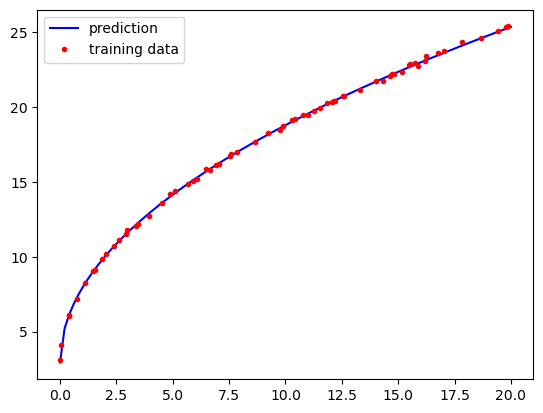

In [35]:
plt.plot(st_values, sm_values, 'b', label='prediction')
plt.plot(t_train, m_train, 'r.', label='training data')
plt.legend();

# Comparison

We can plot the output of both models.

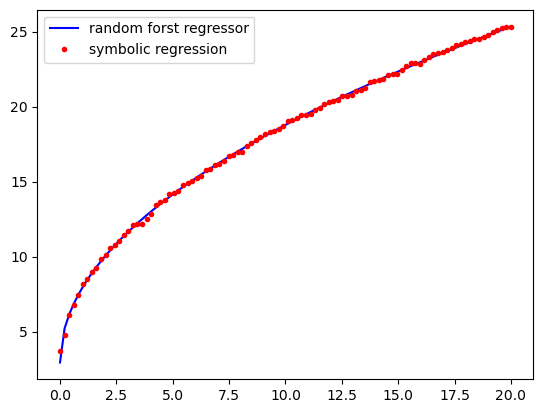

In [36]:
plt.plot(st_values, sm_values, 'b', label='random forst regressor')
plt.plot(t_values, m_values, 'r.', label='symbolic regression')
plt.legend();

Both methods produce very resonably looking results, but how to they behave outside of the training domain, i.e., do they generalize?

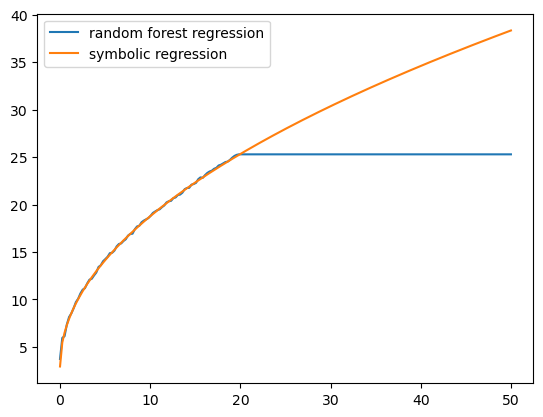

In [38]:
t_extra = np.linspace(0.0, 50.0, 200)
plt.plot(t_extra, rfr.predict(t_extra.reshape((-1, 1))), label='random forest regression');
plt.plot(t_extra, sr.predict(t_extra.reshape((-1, 1))), label='symbolic regression')
plt.legend();

The random forest regressor clearly doesn't generalize outside of the training domain